<a href="https://colab.research.google.com/github/Sagalo04/Fourier/blob/master/Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/PDI/Ejemplos clase/'
os.chdir(path)
!pwd
# graficar imagenes estadisticas en el notebook

%matplotlib inline

/content/drive/My Drive/PDI/Ejemplos clase


In [0]:
def displayGray3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(20,20))
  plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayGray4(a,b,c,d,title1 = "Original", title2="Edited", title3="Edited",title4="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(221), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(222), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(223), plt.imshow(c,cmap='gray'), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.subplot(224), plt.imshow(d,cmap='gray'), plt.title(title4)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayGray2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(15,15))
  plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(131), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def readRGB(imgPath):
  img=cv2.imread(imgPath)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

In [0]:
img = cv2.imread('A1.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum,'Input image','Magnitude Spectrum')

img = cv2.imread('A2.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum,'Input image','Magnitude Spectrum')

img = cv2.imread('K1.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum,'Input image','Magnitude Spectrum')

img = cv2.imread('K2.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum,'Input image','Magnitude Spectrum')

img = cv2.imread('S1.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum,'Input image','Magnitude Spectrum')

img = cv2.imread('S2.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum,'Input image','Magnitude Spectrum')


In [0]:
img = cv2.imread('S1.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))
magnitude_spectrum_or=20*np.log(np.abs(f))

displayGray3(img,magnitude_spectrum,magnitude_spectrum_or)

# **Filtros**

# **Filtro pasa bajas**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


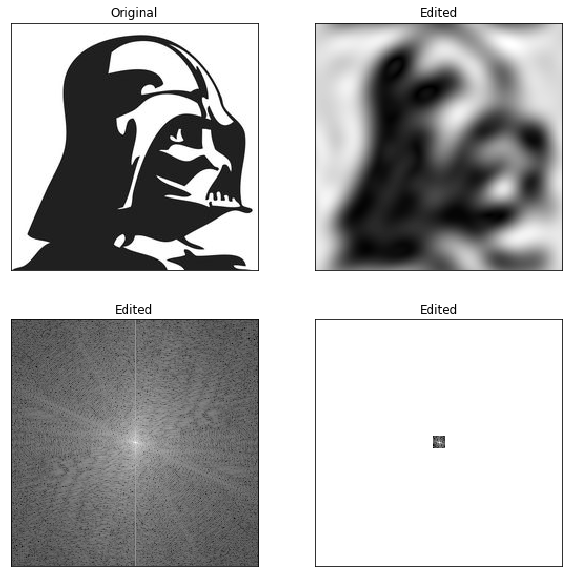

In [145]:
img = cv2.imread('dark.jpg',0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags= cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fils,cols = img.shape
centfils, centcols= fils/2,cols/2

#Creamos una cascara con un centro cuadrado de 1 y el resto zeros
mask=np.zeros((fils,cols,2), np.uint8)
mask[np.int32(centfils)-6:np.int32(centfils)+6, np.int32(centcols)-6:np.int32(centcols)+6]=1
#Aplicar la mascara y luego obtenemos la inveresa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))

f_ishift=np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

#displayGray2(img,img_back)
#displayGray2(magnitude_spectrum,fshift_mask_mag)

displayGray4(img,img_back,magnitude_spectrum,fshift_mask_mag)
  
  

# **Filtro pasa altas**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


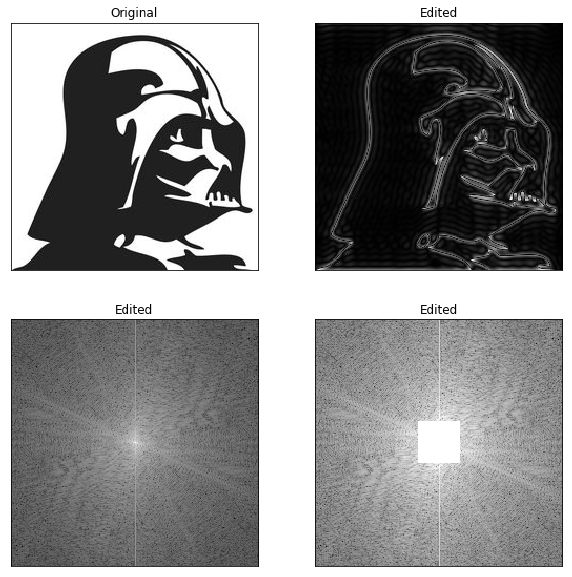

In [155]:
img = cv2.imread('dark.jpg',0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags= cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fils,cols = img.shape
centfils, centcols= fils/2,cols/2

#Creamos una cascara con un centro cuadrado de 1 y el resto zeros
mask=np.ones((fils,cols,2), np.uint8)
mask[np.int32(centfils)-20:np.int32(centfils)+20, np.int32(centcols)-20:np.int32(centcols)+20]=0

#Aplicar la mascara y luego obtenemos la inveresa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))

f_ishift=np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

#displayGray2(img,img_back)
#displayGray2(magnitude_spectrum,fshift_mask_mag)

displayGray4(img,img_back,magnitude_spectrum,fshift_mask_mag)